In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
from sklearn.linear_model import LinearRegression

%matplotlib inline

df=pd.read_csv(r'C:\Users\Roxana\Desktop\StormCrimesRW.csv')

In [165]:
df.head()

,Date,CrimeActivity,StormActivity,Zone,City
0,10/1/2019,Violent Crime,Coastal Flood,COASTAL MIAMI-DADE COUNTY,South Miami
1,10/1/2019,Murder and Non-negligent manslaughter,Strong Wind Rain,COASTAL MIAMI-DADE COUNTY,Biscayne Park
2,10/1/2019,Motor Vehicle - Theft,Lightning,COASTAL MIAMI-DADE COUNTY,Miami Beach
3,10/1/2019,Murder and Non-negligent manslaughter,Thunderstorm Wind,METROPOLITAN MIAMI-DADE,Sweetwater
4,10/1/2019,Violent Crime,Tropical Storm,COASTAL MIAMI-DADE COUNTY,Miami Springs


In [167]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
 #Count occurrences per day
time_series = df.groupby('Date').count()

time_series.head()

,CrimeActivity,StormActivity,Zone,City
Date,,,,
10/1/2019,9,9,9,9
10/10/2019,2,2,2,2
10/11/2019,7,6,7,7
10/12/2019,9,7,9,9
10/13/2019,7,6,7,7


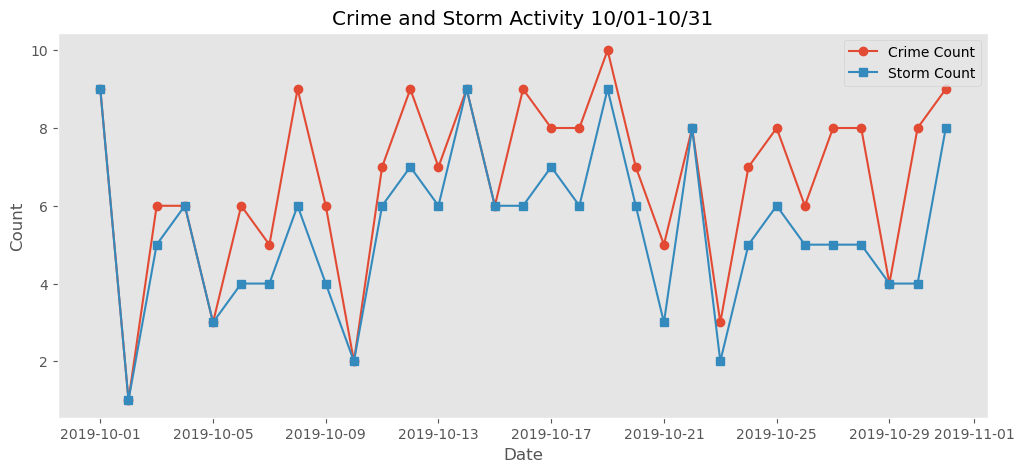

In [171]:
# Plot crime&storm activity over time
plt.figure(figsize=(12,5))
plt.plot(time_series.index, time_series['CrimeActivity'], marker='o', label='Crime Count')
plt.plot(time_series.index, time_series['StormActivity'], marker='s', label='Storm Count')

plt.title('Crime and Storm Activity 10/01-10/31')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

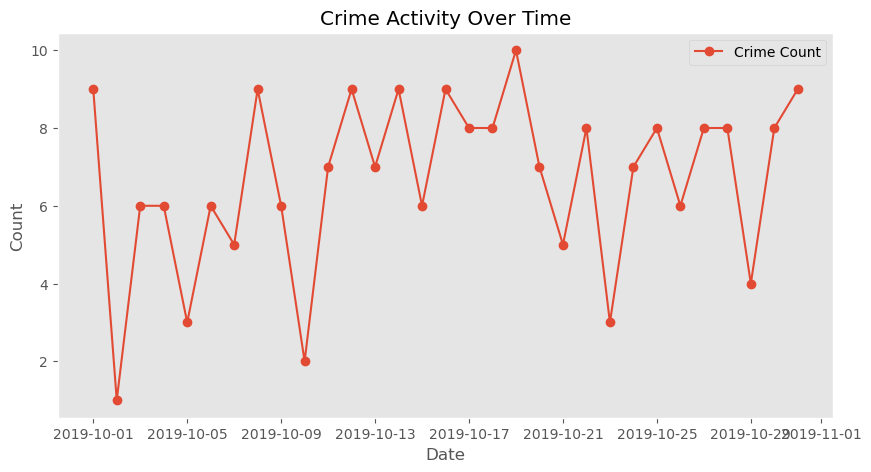

In [150]:
# Plot crime activity over time
plt.figure(figsize=(10,5))
plt.plot(time_series.index, time_series['CrimeActivity'], marker='o', label='Crime Count')

plt.title('Crime Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

In [5]:
#set date as index to resample
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True) 


In [7]:
# Resample data every 2 days
df_resampled = df.resample('1D').count()  

df_resampled.head()


,index,CrimeActivity,StormActivity,Zone,City
Date,,,,,
2019-10-01,9,9,9,9,9
2019-10-02,1,1,1,1,1
2019-10-03,6,6,5,6,6
2019-10-04,6,6,6,6,6
2019-10-05,3,3,3,3,3


In [11]:
df_first_3_rows = df_resampled.iloc[:5]
time_series=df_first_3_rows

print(time_series)


            index  CrimeActivity  StormActivity  Zone  City
Date                                                       
2019-10-01      9              9              9     9     9
2019-10-02      1              1              1     1     1
2019-10-03      6              6              5     6     6
2019-10-04      6              6              6     6     6
2019-10-05      3              3              3     3     3


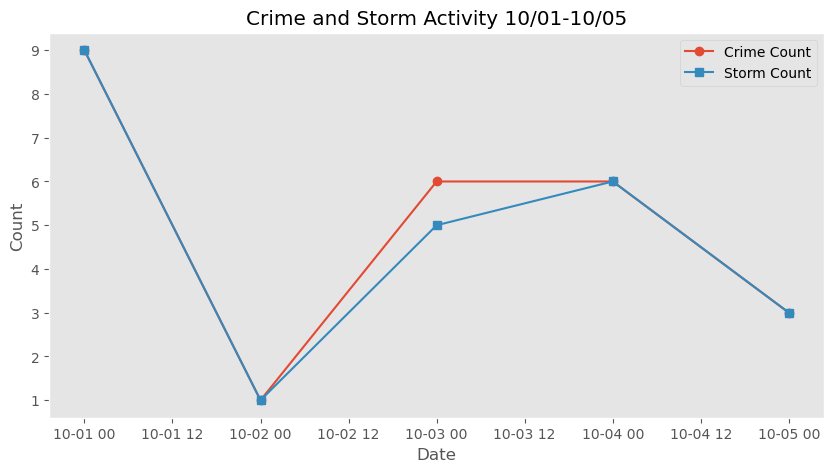

In [13]:
# Plot crime&storm activity for first five days
plt.figure(figsize=(10,5))
plt.plot(time_series.index, time_series['CrimeActivity'], marker='o', label='Crime Count')
plt.plot(time_series.index, time_series['StormActivity'], marker='s', label='Storm Count')

plt.title('Crime and Storm Activity 10/01-10/05')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()
